# Tarea 4 parte 1


1.
   
   El estudio de estrellas binarias es de gran importancia para comprobar los existentes modelos estelares. Ya que tenemos un sistema de dos cuerpos y es posible medir la orbita gracias al periodo obtenido del eclipse, luego se pueden deducir las masas en acción y radios.

2.

El espectrografo es necesario para obtener las velocidades radiales. Esto se encuentra gracias al efecto de corrimiento al rojo en el espectro obtenido.



3.

Los datos fueron obtenidos de STEREO HI (Heliospheric Imagers) -1. 

os candidatos cumplen con los requisitos:

$\circ$ Estrella principal de alto brillo

$\circ$ Estrella acompañante de masa menor a 0.8 $M_\circ$

$\circ$ Estrella acompañante de radio menor a 0.4 $R_\circ$

$\circ$ Eclipse total

$\circ$ Baja contaminación de otras estrellas 



4.

In [1]:
import ephem

El primer paso será extraer las coordenadas RA y DEC dadas en Wraight et al 2012.

Estas están en grados, luego es necesario transformarlas a hms y dms respectivamente, esto se puede hacer facilmente gracias a astropy.coordinates.

In [2]:
#ID          RA           DEC      Mag
#HD23765    57.1205       21.7975  9.53
#HD287039   71.5819      12.7448  9.88
#BD-07 3648 203.727    −8.44247  11.3
#HD75767    133.068     8.06293  6.59

#HD89849   155.541     6.21829   9.15
#HD198044  312.091    -22.7407   7.2
#HD205403  323.766    -3.7349    8.02
#HD213597  338.136    1.58245   7.81
#HD222891  356.162   -8.8487    8.07

In [3]:
from astropy import units as u
from astropy.coordinates import SkyCoord

/home/zapredfield/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [4]:
r=[57.1205,71.5819,203.727,133.068,155.541,312.091,323.766,338.136,356.162]#en grados
d=[21.7975,12.7448,-8.44247,8.06293,6.21829,-22.7407,-3.7349, 1.58245,-8.8487]

C=[]

for i in range(9):
    c = SkyCoord(ra=r[i]*u.degree, dec=d[i]*u.degree)
    C.append(c)

Ra=[]
Dec=[]
    
for i in C:
    Ra.append([i.ra.hms[0],i.ra.hms[1],i.ra.hms[2]])
    Dec.append([i.dec.dms[0],i.dec.dms[1],i.dec.dms[2]])

In [5]:
for i in range(9):
    print "estrella",i
    print Ra[i]
    print Dec[i]

estrella 0
[3.0, 48.0, 28.92000000000337]
[21.0, 47.0, 50.999999999997954]
estrella 1
[4.0, 46.0, 19.656000000003644]
[12.0, 44.0, 41.279999999998864]
estrella 2
[13.0, 34.0, 54.480000000010733]
[-8.0, -26.0, -32.892000000000507]
estrella 3
[8.0, 52.0, 16.320000000006303]
[8.0, 3.0, 46.54799999999895]
estrella 4
[10.0, 22.0, 9.8400000000086152]
[6.0, 13.0, 5.8439999999987435]
estrella 5
[20.0, 48.0, 21.840000000011344]
[-22.0, -44.0, -26.520000000001289]
estrella 6
[21.0, 35.0, 3.8400000000208934]
[-3.0, -44.0, -5.6400000000004979]
estrella 7
[22.0, 32.0, 32.640000000015164]
[1.0, 34.0, 56.819999999999737]
estrella 8
[23.0, 44.0, 38.880000000015116]
[-8.0, -50.0, -55.319999999996838]


Para operar pyephem y saber las fechas de observación se necesitan tanto las coordenadas de las estrellas a estudiar como las del lugar de observación.

Objetos:

Entregamos un nombre, tipo de objeto, espectro, magnitud V, RA(hms) y Dec(dms), aunque realmente solo son necesarios estos dos ultimos.

In [6]:
bin1 = ephem.readdb("HD23765,f|S|F8,3:48:28.92,21:47:51.0,9.53,2000")

bin2 = ephem.readdb("HD287039,f|S|F8,4:46:19.65,12:44:41.28,9.88,2000")

bin3 = ephem.readdb("BD-07,f|S|F8,13:34:54.48,-8:26:32.892,11.3,2000")

bin4 = ephem.readdb("HD75767,f|S|F8,8:52:16.32,8:3:46.548,9.88,2000")

bin5 = ephem.readdb("HD89849,f|S|F8,10:22:9.84,6:13:5.84,9.88,2000")

bin6 = ephem.readdb("HD198044,f|S|F8,20:48:21.84,-22:44:26.52,9.88,2000")

bin7 = ephem.readdb("HD205403,f|S|F8,21:35:3.84,-3:44:5.64,9.88,2000")

bin8 = ephem.readdb("HD213597,f|S|F8,22:32:32.64,1:34:56.81,9.88,2000")

bin9 = ephem.readdb("HD222891,f|S|F8,23:44:38.88,-8:50:55.31,9.88,2000")

Lugar: 

Se debe dar una latitud, longitud, elevación y fecha/hora. Se dan las coordenadas de Santiago y elevación del Observatorio UC de Santa Martina.

In [7]:
gatech = ephem.Observer()
gatech.lon ='-70.6693' 
gatech.lat ='-33.4489'
gatech.elevation = 1450
gatech.date = '2016/11/14 24:00' 

Pyephem nos entrega la posición de un objeto en coordenadas de azimut y altitud para una fecha dada. Es de especial interes la altitud, ya que debido al air mass y limitaciones del telescopio no se puede observar altitudes muy bajas.

Luego iteramos el codigo para ver las altitudes entre las 8pm y 10pm del 2016/11/14.

In [8]:
import numpy as np


bin1.compute(gatech)


lapso=4
minutos=lapso*60


alt1=[]
t1=np.linspace(0,lapso,minutos)

for i in range(minutos):
    old_az, old_alt = bin1.az, bin1.alt
    gatech.date += ephem.minute 
    bin1.compute(gatech)
   # print("%s %s" % (gatech.date, bin1.alt))
    alt1.append("%s" % (bin1.alt))

alt2=[]
alt3=[]
alt4=[]
alt5=[]
alt6=[]
alt7=[]
alt8=[]
alt9=[]

bin2.compute(gatech)

for i in range(minutos):
    old_az, old_alt = bin2.az, bin2.alt
    gatech.date += ephem.minute 
    bin2.compute(gatech)
   # print("%s %s" % (gatech.date, bin1.alt))
    alt2.append("%s" % (bin2.alt))
    
bin3.compute(gatech)    
    
for i in range(minutos):
    old_az, old_alt = bin3.az, bin3.alt
    gatech.date += ephem.minute 
    bin3.compute(gatech)
   # print("%s %s" % (gatech.date, bin1.alt))
    alt3.append("%s" % (bin3.alt))

bin4.compute(gatech)    
    
for i in range(minutos):
    old_az, old_alt = bin4.az, bin4.alt
    gatech.date += ephem.minute 
    bin4.compute(gatech)
   # print("%s %s" % (gatech.date, bin1.alt))
    alt4.append("%s" % (bin4.alt))
    
    
bin5.compute(gatech)    
    
for i in range(minutos):
    old_az, old_alt = bin5.az, bin5.alt
    gatech.date += ephem.minute 
    bin5.compute(gatech)
   # print("%s %s" % (gatech.date, bin1.alt))
    alt5.append("%s" % (bin5.alt))

    
bin6.compute(gatech)    
    
for i in range(minutos):
    old_az, old_alt = bin6.az, bin6.alt
    gatech.date += ephem.minute 
    bin6.compute(gatech)
   # print("%s %s" % (gatech.date, bin1.alt))
    alt6.append("%s" % (bin6.alt))
    
bin7.compute(gatech)    
    
for i in range(minutos):
    old_az, old_alt = bin7.az, bin7.alt
    gatech.date += ephem.minute 
    bin7.compute(gatech)
   # print("%s %s" % (gatech.date, bin1.alt))
    alt7.append("%s" % (bin7.alt))
    
bin8.compute(gatech)    
    
for i in range(minutos):
    old_az, old_alt = bin8.az, bin8.alt
    gatech.date += ephem.minute 
    bin8.compute(gatech)
   # print("%s %s" % (gatech.date, bin1.alt))
    alt8.append("%s" % (bin8.alt))
    
bin9.compute(gatech)    
    
for i in range(minutos):
    old_az, old_alt = bin9.az, bin9.alt
    gatech.date += ephem.minute 
    bin9.compute(gatech)
   # print("%s %s" % (gatech.date, bin1.alt))
    alt9.append("%s" % (bin9.alt))

In [9]:
def hms2h(hms):
    h,m,s=hms.split(":")
    if hms[0]=="-":
        horas=float(h)-(float(m)/60)-(float(s)/3600)
    else:
        horas=float(h)+(float(m)/60)+(float(s)/3600)   
    return horas
    

alturas1=[]

for i in alt1:
    alturas1.append(hms2h(i))
    
alturas2=[]

for i in alt2:
    alturas2.append(hms2h(i))

alturas3=[]

for i in alt3:
    alturas3.append(hms2h(i))

alturas4=[]

for i in alt4:
    alturas4.append(hms2h(i))
    
alturas5=[]

for i in alt5:
    alturas5.append(hms2h(i))
    
alturas6=[]

for i in alt6:
    alturas6.append(hms2h(i))
    
alturas7=[]

for i in alt7:
    alturas7.append(hms2h(i))
    
alturas8=[]

for i in alt8:
    alturas8.append(hms2h(i))
    
alturas9=[]

for i in alt9:
    alturas9.append(hms2h(i))

In [10]:
import matplotlib.pyplot as plt

%matplotlib inline

A continuación las alturas para los distintos objetos a partir de las 8pm (hora local):

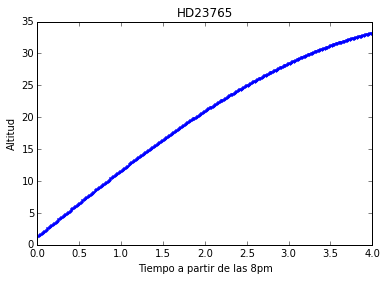

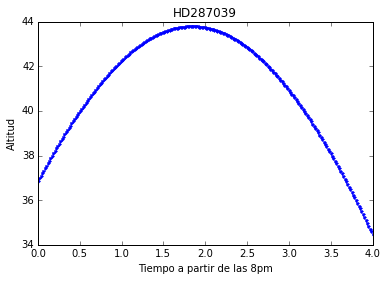

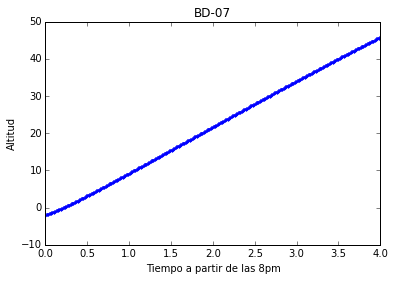

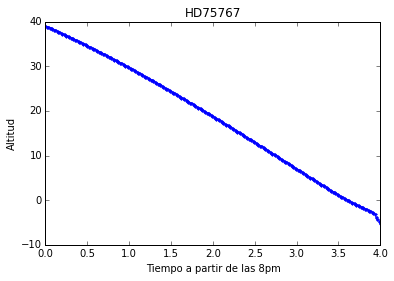

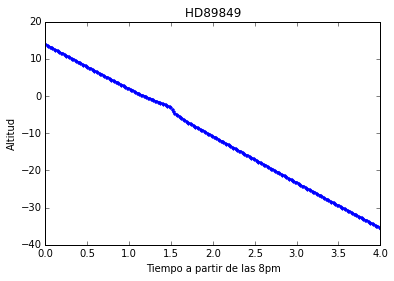

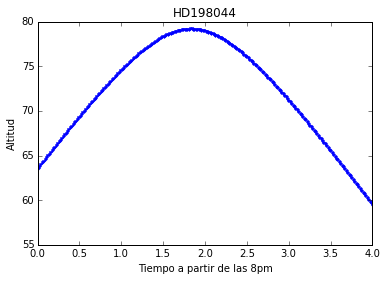

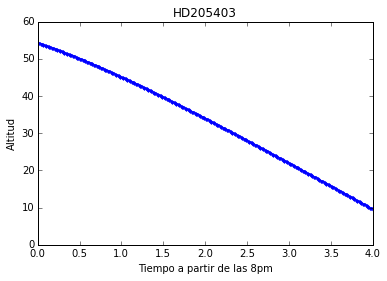

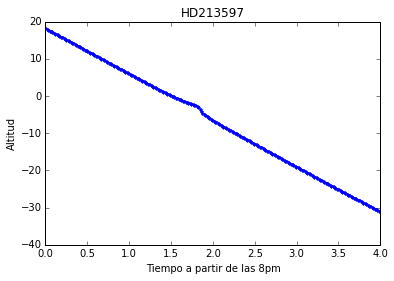

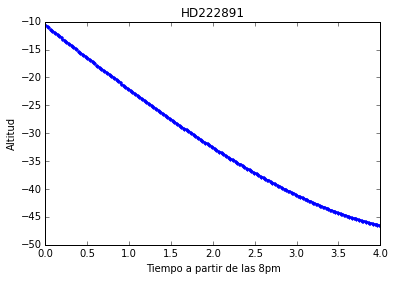

In [11]:
plt.plot(t1,alturas1,".")
plt.title("HD23765")
plt.xlabel("Tiempo a partir de las 8pm")
plt.ylabel("Altitud")
plt.show()


plt.plot(t1,alturas2,".")
plt.title("HD287039")
plt.xlabel("Tiempo a partir de las 8pm")
plt.ylabel("Altitud")
plt.show()

plt.plot(t1,alturas3,".")
plt.title("BD-07")
plt.xlabel("Tiempo a partir de las 8pm")
plt.ylabel("Altitud")
plt.show()

plt.plot(t1,alturas4,".")
plt.title("HD75767")
plt.xlabel("Tiempo a partir de las 8pm")
plt.ylabel("Altitud")
plt.show()

plt.plot(t1,alturas5,".")
plt.title("HD89849 ")
plt.xlabel("Tiempo a partir de las 8pm")
plt.ylabel("Altitud")
plt.show()

plt.plot(t1,alturas6,".")
plt.title("HD198044")
plt.xlabel("Tiempo a partir de las 8pm")
plt.ylabel("Altitud")
plt.show()

plt.plot(t1,alturas7,".")
plt.title("HD205403")
plt.xlabel("Tiempo a partir de las 8pm")
plt.ylabel("Altitud")
plt.show()

plt.plot(t1,alturas8,".")
plt.title("HD213597")
plt.xlabel("Tiempo a partir de las 8pm")
plt.ylabel("Altitud")
plt.show()

plt.plot(t1,alturas9,".")
plt.title("HD222891")
plt.xlabel("Tiempo a partir de las 8pm")
plt.ylabel("Altitud")
plt.show()

Con esto, los mejores candidatos parecen ser HD198044, HD205403 y HD 287039

5.

Las funciones usadas en esta parte para transformaciones MJD-JD-date fueron tomadas de:

https://gist.github.com/jiffyclub/1294443

En Wraight et al 2012 se da la fecha de primer transito observado (MJD) y el periodo de dicho transito.

In [12]:
import jdutil as jdut
import math
import datetime as dt

Trasnformamos de MJD a fechas Y/M/D.

In [22]:
mjd=[54450.509489,54213.264019,54224.548593,54305.226101,54353.170536,54285.947481,54123.634818,54138.602903,54150.650434]
p=[5.15195,1.6865,2.2111,3.0781,2.5265,10.2478,2.4449,2.4238,1.594]
jd=[]
day=[]
for i in range(len(mjd)):
    jd.append(jdut.mjd_to_jd(mjd[i]))
    day.append(jdut.jd_to_date(jd[i]))
    
for i in day:
    print i

(2007, 12, 16.509488999843597)
(2007, 4, 23.264018999878317)
(2007, 5, 4.548593000043184)
(2007, 7, 24.226100999861956)
(2007, 9, 10.170535999815911)
(2007, 7, 4.947480999864638)
(2007, 1, 23.63481799978763)
(2007, 2, 7.602903000079095)
(2007, 2, 19.65043399995193)


Será util también la relación entre la fecha de hoy 2016/11/4  y su fecha MJD.

In [27]:
#fecha actual

actual=jdut.jd_to_mjd(jdut.date_to_jd(2016,11,4))
print "2016/11/4 = "+str(actual)

2016/11/4 = 57696.0


Luego obtenemos la fecha del primer transito luego de la fecha de la fecha actual.

In [28]:
inicio=[]
for j in range(len(mjd)):
    s=mjd[j]
    pe=p[j]
    h=0
    for i in range(10000):
        s=s+pe
        if s>=57696 and h==0:
            inicio.append(s)
            h=h+1
            
for i in inicio:
    print i

57696.237989
57697.573019
57698.186693
57697.292301
57698.256536
57698.464881
57698.078618
57696.741303
57697.300434


Ahora a partir de estas fechas de primer transito ajustamos una función sinusoidal con periodo igual al dado por Wraight et al 2012.

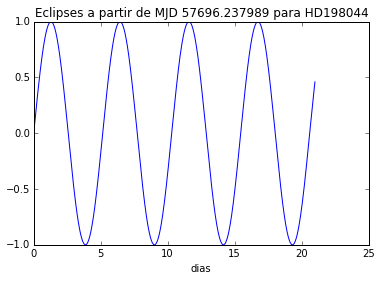

In [16]:
import math as mt

def sin(x,p):
    pi=mt.pi
    k=(2*pi)/p
    y=mt.sin(k*x)
    return y

x=np.linspace(0,21,1000)


y=[]
for i in x:
    y.append(sin(i,p[0]))

plt.plot(x,y,"-")
plt.title("Eclipses a partir de MJD "+str(inicio[0])+" para HD198044")
plt.xlabel("dias")
plt.show()

El ejemplo de arriba es de HD198044. La idea para obtener las fechas de cuadratura entonces es obtener los maximos y minimos de la funcion sinusoidal, estos son los puntos donde se producen las maximas velocidades radiales.

Los maximos se darán en sin(x=multiplo impar del periodo/4

In [17]:
cuadraturas=[]

for i in range(len(mjd)):
    cuantos=mt.ceil((21/p[i])*2)
    ini=inicio[i]
    lista=[]
    for j in range(1,int(cuantos)):
        cuadr=ini+p[i]*(2*j-1)/4
        lista.append(cuadr)
    cuadraturas.append(lista)

Las fechas de cuadratura luego son:

In [18]:
import jdutil as jdut

fechas=[]
for i in cuadraturas:
    lista=[]
    for j in i:
        lista.append(jdut.jd_to_datetime(jdut.mjd_to_jd(j)))
    fechas.append(lista)

In [19]:
names=["HD198044","HD23765","HD287039","HD89849","BD073648","HD75767","HD205403","HD213597","HD222891"]
u=0
for i in fechas:
    print names[u]
    u=u+1
    for j in i:
        print j

HD198044
2016-11-05 12:37:24.369560
2016-11-08 02:26:48.609554
2016-11-10 16:16:12.849588
2016-11-13 06:05:37.089582
2016-11-15 19:55:01.329575
2016-11-18 09:44:25.569569
2016-11-20 23:33:49.809563
2016-11-23 13:23:14.049557
HD23765
2016-11-05 23:52:17.242220
2016-11-06 20:06:34.042213
2016-11-07 16:20:50.842206
2016-11-08 12:35:07.642199
2016-11-09 08:49:24.442232
2016-11-10 05:03:41.242225
2016-11-11 01:17:58.042218
2016-11-11 21:32:14.842211
2016-11-12 17:46:31.642204
2016-11-13 14:00:48.442197
2016-11-14 10:15:05.242230
2016-11-15 06:29:22.042223
2016-11-16 02:43:38.842216
2016-11-16 22:57:55.642209
2016-11-17 19:12:12.442202
2016-11-18 15:26:29.242195
2016-11-19 11:40:46.042228
2016-11-20 07:55:02.842221
2016-11-21 04:09:19.642214
2016-11-22 00:23:36.442207
2016-11-22 20:37:53.242199
2016-11-23 16:52:10.042233
2016-11-24 13:06:26.842225
2016-11-25 09:20:43.642218
HD287039
2016-11-06 17:44:50.035272
2016-11-07 20:16:49.555270
2016-11-08 22:48:49.075268
2016-11-10 01:20:48.595266
20

Las estrellas que se observaran son HD198044 y HD205403 debido a sus alturas vistas antes

HD198044

2016-11-05 12:37:24

2016-11-08 02:26:48

2016-11-10 16:16:12

2016-11-13 06:05:37

2016-11-15 19:55:01

2016-11-18 09:44:25

2016-11-20 23:33:49

2016-11-23 13:23:14

HD205403

2016-11-06 16:33:22

2016-11-07 21:53:42

2016-11-09 03:14:01

2016-11-10 08:34:21

2016-11-11 13:54:41

2016-11-12 19:15:00

2016-11-14 00:35:20

2016-11-15 05:55:40

2016-11-16 11:15:59

2016-11-17 16:36:19

2016-11-18 21:56:39

2016-11-20 03:16:58

2016-11-21 08:37:18

2016-11-22 13:57:38

2016-11-23 19:17:57

2016-11-25 00:38:17

2016-11-26 05:58:37


7.

Se nos dice que para un cuerpo de magnitud V=3.5, para obtener precisión p=10m/s se requieren 300s de exposición.

Es importante notar que una mayor S/N generará una mejor precisión y como a mayor valor de "p" la precisión es peor, luego S/N es inversamente proporcional a p.

$$\large \frac{S}{N} \quad  \alpha \quad p^{-1}$$


Para este tipo de observaciones la señal esta dada por:

$$ \large S=A\cdot t\cdot 10^{-0.4\cdot V} $$

Donde A es una cosntante, t tiempo de exposición y V magnitud.

Siendo que la distribución de las detecciones es de Poisson:

$$N=\sqrt{S} $$

$$\frac{S}{N} = \sqrt{S} = \sqrt{A\cdot t} \cdot 10^{-0.2\cdot V}  $$

Partamos en el caso que tenemos una magnitud V y queremos saber el tiempo de exposición necesario para obtener una precisión de 10m/s. Luego como S/N es proporcional a p es posible plantear la relación entre el caso conocido para p=10m/s y el que queremos estudiar.

$$ \sqrt{A\cdot t_1} \cdot 10^{-0.2\cdot V_1} = \sqrt{A\cdot t_2} \cdot 10^{-0.2\cdot V}  $$

$t_1=300s$ y $V_1=3.5$

Despejando $t_2$, tiempo que nos interesará:

$$ \large t_2=10^{0.4(V_2-3.5)} \cdot 300 $$

Con esto tenemos el tiempo para obtener p=10m/s, pero realmente queremos para p=100m/s, luego veamos la relación entre tiempo y precisión.

Como vimos antes $\frac{S}{N} \alpha  p^{-1}$, por lo tanto $\large \frac{S}{N} \quad  \alpha \quad \sqrt{t}^{-1}$.

Luego si decimos que A->10 m/s y B->100m/s, solo quedará:

$$ \frac{p_A}{p_B}=\frac{t_A^{-0.5}}{t_B^{-0.5}}  $$

$p_A=10m/S$, $p_B=100m/s$ y $t_A=t_2$ obtenido previamente. Despejando, el tiempo para p=100m/s estará dado por:

$$\large t_B=10^{-2}t_2  $$


In [20]:
V=[7.2,9.53,9.88,9.15,11.3,6.59,8.02,7.81,8.07]
t2=[]
for v in V:
    temp=(10**(0.4*(v-3.5)))*300
    t2.append(temp)
    temp
tB=[]

for t in t2:
    temp=(10**(-2))*t
    tB.append(temp)

In [21]:
for i in range(len(tB)):
    print str(names[i])+": Tiempo de exposición: "+str(tB[i])+"s"

HD198044: Tiempo de exposición: 90.5985516121s
HD23765: Tiempo de exposición: 774.67805719s
HD287039: Tiempo de exposición: 1069.35340028s
HD89849: Tiempo de exposición: 545.910257583s
BD073648: Tiempo de exposición: 3954.77021567s
HD75767: Tiempo de exposición: 51.6560572496s
HD205403: Tiempo de exposición: 192.806315195s
HD213597: Tiempo de exposición: 158.899033167s
HD222891: Tiempo de exposición: 201.892996885s
